In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)

In [3]:
df=pd.read_csv('INFLUD-07-06-2021.csv',
               sep=';', 
               header=0,
               usecols=['DT_NOTIFIC','CLASSI_FIN','ID_MUNICIP','DT_NASC','NU_IDADE_N','COD_IDADE','FATOR_RISC','HOSPITAL','UTI','DT_ENTUTI','DT_DIGITA','EVOLUCAO'])
#158,159,165 colunas usecols=[0,7,12,13,15,42,69,76,77]

C:\Users\jv-nu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Executando a seleção de Recife e convertendo a coluna de data para o formato de objeto reconhecido pelo python

In [4]:
df_rec= df[df['ID_MUNICIP'].str.contains('RECIFE',regex=True,na=False)]

In [5]:
#df_rec.to_excel('SRAG_RECIFE.xlsx', index = False)

In [6]:
df_rec=pd.read_excel('SRAG_RECIFE.xlsx')

In [7]:
df_rec['DT_NOTIFIC'] =pd.to_datetime(df_rec['DT_NOTIFIC'],format='%d/%m/%Y', errors='ignore')

### Data Frame de Recife ordenado por data, e com o formato datetime

In [8]:
rec_order=df_rec.sort_values(by=['DT_NOTIFIC'])

### Criando uma coluna de frequências de casos por dia, com datas ordenadas

In [9]:
freq=rec_order.DT_NOTIFIC.value_counts().to_frame()

### Inserindo a coluna no dataframe e renomeando

In [11]:
rec_order=rec_order.join(freq, on='DT_NOTIFIC',lsuffix='DT_L')

In [12]:
rec_order=rec_order.rename(columns = {'DT_NOTIFICDT_L': 'DATE','DT_NOTIFIC':'FREQUENCY'})

In [13]:
rec_order

,DATE,ID_MUNICIP,DT_NASC,NU_IDADE_N,COD_IDADE,FATOR_RISC,HOSPITAL,UTI,DT_ENTUTI,CLASSI_FIN,EVOLUCAO,DT_DIGITA,FREQUENCY
0,2020-01-02,RECIFE,22/11/2019,2,2002,N,1.0,2.0,NaN,4.0,NaN,03/01/2020,3
1,2020-01-02,RECIFE,01/07/2008,11,3011,N,1.0,2.0,NaN,4.0,NaN,03/01/2020,3
2,2020-01-02,RECIFE,15/10/2017,2,3002,S,1.0,2.0,NaN,4.0,2.0,02/01/2020,3
3,2020-01-04,RECIFE,20/05/1954,65,3065,N,NaN,NaN,NaN,NaN,NaN,11/01/2021,1
4,2020-01-06,RECIFE,26/07/1956,63,3063,S,1.0,NaN,NaN,4.0,1.0,17/02/2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36198,2021-05-18,RECIFE,20/06/1960,60,3060,N,NaN,NaN,NaN,5.0,2.0,25/05/2021,1
36200,2021-05-27,RECIFE,29/01/1961,59,3059,N,NaN,NaN,NaN,NaN,NaN,27/05/2021,4
36201,2021-05-27,RECIFE,09/08/1985,35,3035,N,NaN,NaN,NaN,NaN,NaN,27/05/2021,4
36199,2021-05-27,RECIFE,17/05/1958,62,3062,S,NaN,NaN,NaN,NaN,NaN,27/05/2021,4


### Plotando gráfico de série temporal de casos por dia

In [14]:
import matplotlib.pyplot as plt
x = list(rec_order['DATE'])
y=list(rec_order['FREQUENCY'])

In [15]:
#é necessário remover os elementos duplicados da lista. Irei fazer isso utilizando um loop for

x1 = []
for i in x:
    if i not in x1:
        x1.append(i)

y1 = []
for i in y:
    if i not in y1:
        y1.append(i)

#Agora com a correção de frequências, podemos plotar o gráfico

#### O Matplotlib já ignora automaticamente os itens repetidos em uma lista, agrupando esses itens e organizando para o plot. Isso faz o passo acima de limpeza dos elementos duplicados desnecessário

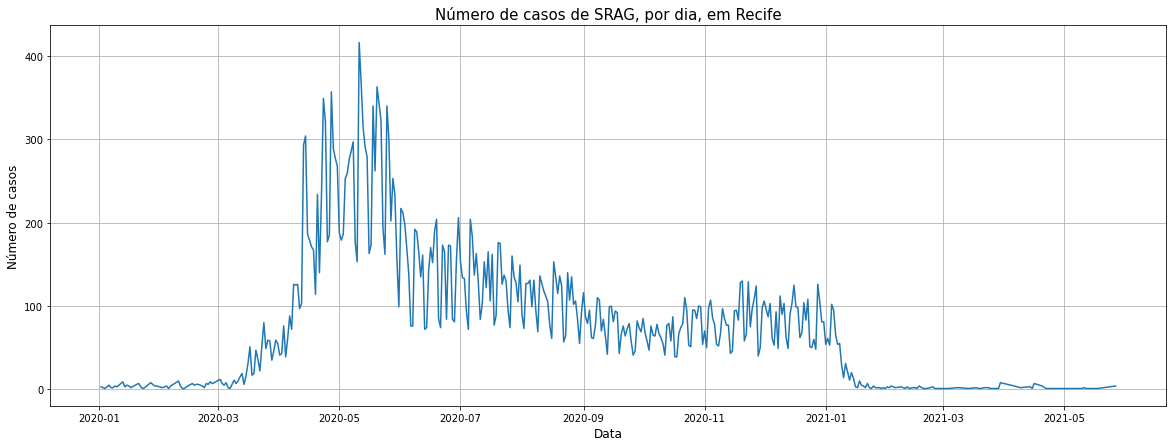

In [17]:
plt.rcParams["figure.figsize"] = (20,7)
plt.plot(x,y)
plt.ylabel('Número de casos',size=12)
plt.xlabel('Data',size=12)
plt.title('Número de casos de SRAG, por dia, em Recife',size=15)
plt.grid()
plt.show()

### Agora irei criar duas novas dispersões temporais:

> número de óbitos por SRAG em Recife

> número de casos de pessoas com comorbidade

In [16]:
óbitos=rec_order[rec_order['EVOLUCAO']==2]
comorb=rec_order[rec_order['FATOR_RISC']=='S']

In [17]:
x_obitos=list(óbitos['DATE'])
y_obitos=list(óbitos['FREQUENCY'])
x_comorb=list(comorb['DATE'])
y_comorb=list(comorb['FREQUENCY'])

In [18]:
from matplotlib.widgets import SpanSelector
import numpy as np

### adicionando isso para o gráfico prévio:

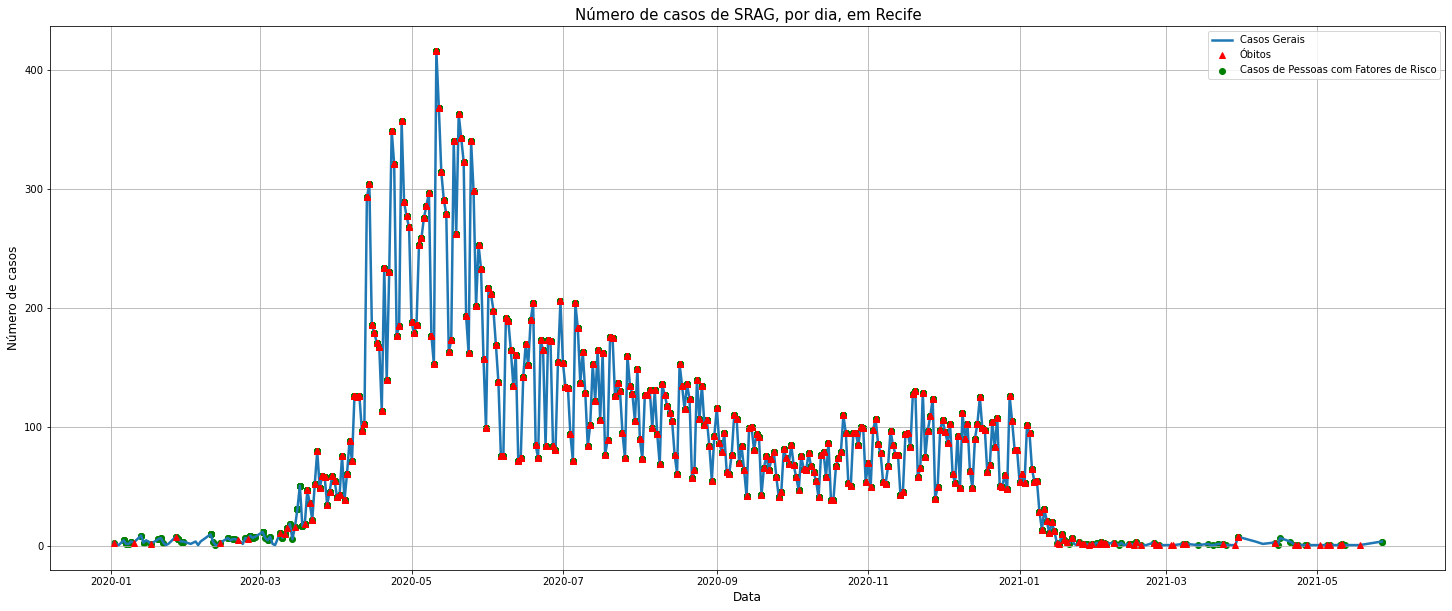

In [19]:
plt.figure(figsize=(25, 10))

plt.plot(x,y, linewidth=2.5)
plt.scatter(x_comorb,y_comorb,color='g')
plt.plot(x_obitos,y_obitos,'r^', linewidth=.75)
plt.ylabel('Número de casos',size=12)
plt.xlabel('Data',size=12)
plt.title('Número de casos de SRAG, por dia, em Recife',size=15)
plt.grid()
plt.legend(['Casos Gerais','Óbitos','Casos de Pessoas com Fatores de Risco'])

plt.show()

### (Preciso converter a lista em datetime para integer, só assim é possível efetuar as operações necessárias)

In [30]:
import time
import datetime as dt

In [83]:
x_str=[]
x_int=[]
for i in x[:]:
    x_str.append(str(i))

def removeletra(i):
    return(i[:11])

for i in x_str:
    x_int.append(removeletra(i))

x_final=[]
for i in x_int:
    x_final.append(i.replace('-',''))

xx=[]
for i in x_final:
    xx.append(int(i))

In [89]:
from ipywidgets import widgets
from ipywidgets import interact


a=widgets.IntRangeSlider(
    value=[],
    min=min(xx),
    max=max(xx),
    step=1,
    description='Ano(s):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)



def plotar(c):
  global y
  d = c
  y1=y[min(d)-min(d):max(d)-min(d)]
  d=np.linspace(min(d),max(d),len(y1))
  #print(d)
  #print(len(d))
  #c=np.arange(min
  plt.plot(d,y1)
  #plt.xticks(np.linspace(min(d),max(d),round(min(d)/len(d))))
  plt.show()
@interact(plotar,c=a)

SyntaxError: unexpected EOF while parsing (<ipython-input-89-e9ea844cee49>, line 31)